## Experimental Place for Interpolation Tool

In this notebook, I try and test interpolations over the BPASS cluster initial mass pair (primary and secondary) and log-a if applicable.

Trying out interpolating over 3D (primary mass - secondary mass - separation) space.
How much time does creating the interpolator take?

First I generate my BPASS isochrone

In [1]:
import spisea
from spisea import synthetic
import time
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
from scipy import interpolate



iso1 = synthetic.Isochrone_Binary(6.78, 2.7,
                                  8000, 0.0,
                                  filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=3.50 for T= 26935 logg=3.29
Changing to T= 50000 for T= 50518 logg=3.84
Changing to logg=5.00 for T= 50518 logg=3.84
Changing to T= 50000 for T=168628 logg=5.83
Changing to logg=5.00 for T=168628 logg=5.83
Changing to logg=3.50 for T= 27821 logg=3.39
Changing to T= 50000 for T=166073 logg=5.80
Changing to logg=5.00 for T=166073 logg=5.80
Changing to T= 50000 for T=162596 logg=5.78
Changing to logg=5.00 for T=162596 logg=5.78
Changing to logg=3.00 for T= 23226 logg=2.95
Changing to T= 50000 for T=169071 logg=5.83
Changing to logg=5.00 for T=169071 logg=5.83
Changing to T= 50000 for T=166855 logg=5.80
Changing to logg=5.00 for T=166855 logg=5.80
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=143840 logg=5.56
Changing to logg=5.00 for T=143840 logg=5.56
Changing to T= 50000 for T=113794 logg=5.39
Changing to logg=5.00 for T=113794 logg=5.39
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.

In [2]:
len(np.where(iso1.secondaries['merged'])[0])

355

Now,we create interpolator functions for finding Teff, L, logg, whether a star is WR, current mass, phase, and Kp mag of both primary and secondary stars. We need to address the case when a) a multiplicity generating log_a values is used, b) multiplicity not generating log_a values is used, and c) no multiplicity is used or single stars are being generated.

For each parameter for which an interpolator is made (except for whether a secondary star is merged and log_a), we also measure the time it takes for creating both the interpolators for the primaries and for the secondaries 

In [3]:
# Case where multiplicity DK is used.
li = list(zip(iso1.primaries['mass'], iso1.secondaries['mass'], iso1.secondaries['log_a']))
li2 = list(zip(iso1.primaries['mass'], iso1.secondaries['mass']))

interp_keys = ['Teff', 'L', 'logg', 'isWR', 'mass_current', 'phase', 'm_nirc2_Kp']
iso_interpsP = {}
iso_interpsS = {}
interp_creation_time = []
for ikey in interp_keys:
    print(ikey)
    first = time.time()
    iso_interpsP[ikey] = LinearNDInterpolator(li, iso1.primaries[ikey])
    iso_interpsS[ikey] = LinearNDInterpolator(li, iso1.secondaries[ikey])
    interp_creation_time.append(-first + time.time())
# If multiplicity unresolved is used or for dealing with inputs with 
iso_interpsS['merged'] = LinearNDInterpolator(li, iso1.secondaries['merged'])
iso_interps2P = {}
iso_interps2S = {}
interp_creation_time2 = []
for ikey in interp_keys:
    print(ikey)
    first = time.time()
    iso_interps2P[ikey] = LinearNDInterpolator(li2, iso1.primaries[ikey])
    iso_interps2S[ikey] = LinearNDInterpolator(li2, iso1.secondaries[ikey])
    interp_creation_time.append(-first + time.time())
iso_interps2S['log_a'] = LinearNDInterpolator(li2, iso1.secondaries['log_a'])
iso_interps2S['merged'] = LinearNDInterpolator(li2, iso1.secondaries['merged'])
# Dealing with single stars
iso_interps3 = {}
interp_creation_time3 = []
for ikey in interp_keys:
    first = time.time()
    iso_interps3[ikey] = interpolate.interp1d(iso1.singles['mass'], iso1.singles[ikey],
                                              kind='linear', bounds_error=False, fill_value=np.nan)
    interp_creation_time3.append(-first + time.time())

Teff
L
logg
isWR
mass_current
phase
m_nirc2_Kp
Teff
L
logg
isWR
mass_current
phase
m_nirc2_Kp


Time to create interpolators

In [4]:
interp_creation_time

[0.3852720260620117,
 0.36672115325927734,
 0.3680150508880615,
 0.36423277854919434,
 0.35356807708740234,
 0.344649076461792,
 0.3660430908203125,
 0.024288177490234375,
 0.02470707893371582,
 0.022435665130615234,
 0.022591352462768555,
 0.024641036987304688,
 0.027402877807617188,
 0.02500295639038086]

Sometimes, I do get some weird QHull error. Getting this error, I get the following:


Now, time for a sanity check to see whether stars have physically sensible values. Specifically let's input a primary mass- secondary mass - log a to see what the values are for the interpolated values. Then compare with a represeented star with close primary-secondary-log a params.

$M_1= 1.5M_{\odot}$, $M_2 = 1M_{\odot}$, $\log(a)  = 1.0$

In [5]:
iso_interpsP['Teff'](1.5, 1.0, 1.0)

array(6742.06256558)

In [6]:
iso_interpsP['L'](1.5, 1, 1.0)

array(1.84358619e+27)

In [7]:
iso_interpsS['logg'](1.5, 1, 1.0)

array(4.535488)

In [8]:
iso_interpsS['phase'](1.5, 1, 1.0)

array(5.)

In [9]:
iso_interpsS['Teff']

Now we check into seeing whether change in the Teff, log L, and L, and etcetera are too wild between points. For the sake of visualization let's work with intial masses first. I can't see in 4 D too well.
For reference, we can plot the $(M_{i, primary}, M_{i, secondary})$

First, let's work in 2D. And at the very beginning we plot the just the result of the interpolation over the $(M_{i, primary}, M_{i, secondary})$.

A reason to why we want to just plot over those two parameters is for the case where we use the MultiplicityUnresolved object, as with the Lu et. al 2013 paper.

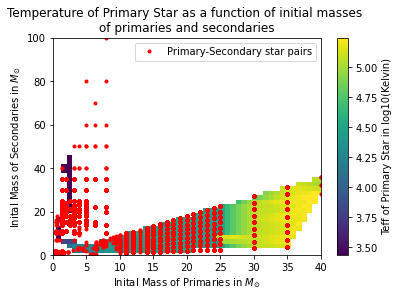

In [10]:
import matplotlib.pyplot as plt
# Indicate which parameters you really want to 
k = 'Teff'
x = iso1.primaries['mass']
y = iso1.secondaries['mass']
X = np.linspace(0, np.max(x))
Y = np.linspace(0, np.max(y))
X, Y = np.meshgrid(X, Y)
Z = iso_interps2P[k](X, Y)
cmesh = plt.pcolormesh(X, Y, np.log10(Z), shading='auto')
plt.plot(x, y, "r.",
        label = "Primary-Secondary star pairs")
plt.legend()
plt.gca().set_xlim([0, np.max(x)])
plt.gca().set_ylim([0, np.max(y)])
plt.xlabel("Inital Mass of Primaries in $M_{\odot}$")
plt.ylabel("Inital Mass of Secondaries in $M_{\odot}$")
x = plt.colorbar()
x.set_label('Teff of Primary Star in log10(Kelvin)')
plt.title("Temperature of Primary Star as a function of initial masses \n" +
          "of primaries and secondaries")
plt.show()

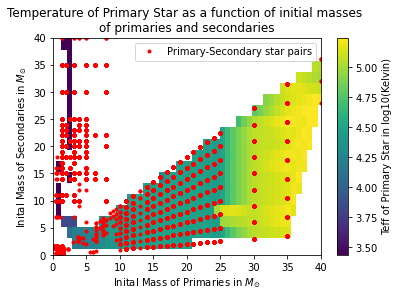

In [11]:
import matplotlib.pyplot as plt
# Indicate which parameters you really want to 
k = 'Teff'
x = iso1.primaries['mass']
y = iso1.secondaries['mass']
X = np.linspace(0, np.max(x))
Y = np.linspace(0, np.max(y))
X, Y = np.meshgrid(X, Y)
Z = iso_interps2P[k](X, Y)
cmesh = plt.pcolormesh(X, Y, np.log10(Z), shading='auto')
plt.plot(x, y, "r.",
        label = "Primary-Secondary star pairs")
plt.legend()
plt.gca().set_xlim([0, 40])
plt.gca().set_ylim([0, 40])
plt.xlabel("Inital Mass of Primaries in $M_{\odot}$")
plt.ylabel("Inital Mass of Secondaries in $M_{\odot}$")
x = plt.colorbar()
x.set_label('Teff of Primary Star in log10(Kelvin)')
plt.title("Temperature of Primary Star as a function of initial masses \n" +
          "of primaries and secondaries")
plt.show()

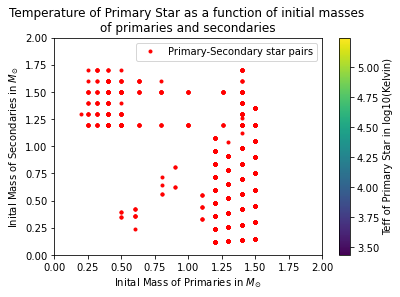

In [12]:
cmesh = plt.pcolormesh(X, Y, np.log10(Z), shading='auto')
x = iso1.primaries['mass']
y = iso1.secondaries['mass']
plt.plot(x, y, "r.",
        label = "Primary-Secondary star pairs")
plt.legend()
plt.gca().set_xlim([0, 2])
plt.gca().set_ylim([0, 2])
plt.xlabel("Inital Mass of Primaries in $M_{\odot}$")
plt.ylabel("Inital Mass of Secondaries in $M_{\odot}$")
x = plt.colorbar()
x.set_label('Teff of Primary Star in log10(Kelvin)')
plt.title("Temperature of Primary Star as a function of initial masses \n" +
          "of primaries and secondaries")
plt.show()

In [13]:
iso_interps2P[k](1.5, 1.0)

array(6736.58819636)

No handles with labels found to put in legend.


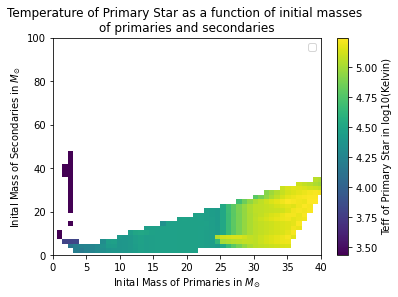

In [14]:
import matplotlib.pyplot as plt
# Indicate which parameters you really want to 
k = 'Teff'
x = iso1.primaries['mass']
y = iso1.secondaries['mass']
z = iso1.secondaries[k]
X = np.linspace(np.min(x), np.max(x))
Y = np.linspace(np.min(y), np.max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
Z = iso_interps2P[k](X, Y)
cmesh = plt.pcolormesh(X, Y, np.log10(Z), shading='auto')
plt.legend()
plt.gca().set_xlim([0, np.max(x)])
plt.gca().set_ylim([0, np.max(y)])
plt.xlabel("Inital Mass of Primaries in $M_{\odot}$")
plt.ylabel("Inital Mass of Secondaries in $M_{\odot}$")
x = plt.colorbar()
x.set_label('Teff of Primary Star in log10(Kelvin)')
plt.title("Temperature of Primary Star as a function of initial masses \n" +
          "of primaries and secondaries")
plt.show()

Hmm, why do I not get really low mass primaries? Perhaps check the minimum mass of primaries with effective temperature > 0.

In [15]:
physical_temps = iso1.primaries[np.where((iso1.primaries['Teff'] > 0) & (iso1.primaries['mass'] < 1.0))[0]]
print(np.where((iso1.primaries['Teff'] > 0) & (iso1.primaries['mass'] < 1.0))[0])
physical_temps

[  78  205  265  479  506  550 1048 1187 1559 1838 1854 1960 2155 2308
 2432 2501 2707 2943 2963 3326 3386 3471 3546 3676 3721 3953 4031 4044
 4142 4235 4327 4382 4465 4560 4566 4616 4732 4764 4766 4808 4854 4918
 4953 5062 5074 5081 5227]


mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_nirc2_Kp
solMass,W,K,m,,,solMass,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64
0.398107,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.038067441246554,False,0.398107,5.0,4,27.030135107344027
0.501187,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.138067424857716,False,0.501187,5.0,4,27.024415614110005
0.6,2.0535814330032142e+26,5391.753140946437,583962775.7355027,4.566473512172838,False,0.95018,5.0,1,21.04234882920624
0.501187,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.138067424857716,False,0.501187,5.0,4,27.024415614110005
0.398107,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.038067441246554,False,0.398107,5.0,4,27.030135107344027
0.630957,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.23806739019378,False,0.630957,5.0,4,27.018726093516804
0.398107,2.6668705105418817e+23,2738.7349246249955,81562431.48962052,4.038067441246554,False,0.398107,5.0,4,27.030135107344027
0.5,1.7339314708096098e+25,3878.6447157207676,327902829.4807104,5.014918516218744,False,0.8413,5.0,1,22.93144683902605


In [16]:
iso1.secondaries[5227]



mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_nirc2_Kp
solMass,,W,K,m,,,solMass,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64
0.63,5.667496591311971,nan,nan,nan,nan,False,nan,-99.0,True,1,nan


In [17]:
iso_interps2P[k](0.6, 0.5)

array(4916.3660655)

In [18]:
iso_interps2P[k](0.9, 0.7)

array(7137.02346546)

In [19]:
iso_interps2P[k](1.0, 1.0)

array(nan)

In [20]:
iso_interps2P[k](1.20, 1.0)

array(nan)

In [21]:
iso_interps2P[k](0.5, 0.4)

array(nan)

In [22]:
iso_interps2P[k](1.1, 1.0)

array(nan)

No handles with labels found to put in legend.


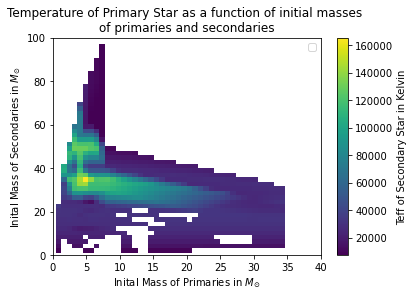

In [23]:
import matplotlib.pyplot as plt
# Indicate which parameters you really want to 
k = 'Teff'
x = iso1.primaries['mass']
y = iso1.secondaries['mass']
z = iso1.secondaries[k]
X = np.linspace(0, np.max(x))
Y = np.linspace(0, np.max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
Z = iso_interps2S[k](X, Y)
cmesh = plt.pcolormesh(X, Y, Z, shading='auto')
plt.legend()
plt.gca().set_xlim([0, np.max(x)])
plt.gca().set_ylim([0, np.max(y)])
plt.xlabel("Inital Mass of Primaries in $M_{\odot}$")
plt.ylabel("Inital Mass of Secondaries in $M_{\odot}$")
x = plt.colorbar()
x.set_label('Teff of Secondary Star in Kelvin')
plt.title("Temperature of Primary Star as a function of initial masses \n" +
          "of primaries and secondaries")
plt.show()

For the previous plot, we start seing secondary stars with "initial" masses that are greater than those of the primary stars because of some weird issues of interpretation in BPASS models, which will get resolved with future versions of the data package.

Preparing for calculation of pseudo-residual. We may want to do something like use inerpolation on all but one point and then calculate the residual from there.

In [24]:
from scipy.spatial import cKDTree as KDTree
# Function pulled out of synthetic to 
def match_binary_system(primary_mass, secondary_mass, loga, iso, include_a):
    """
    Modified matching function used to 
    """
    if (not include_a):
        kdt = KDTree(np.transpose(np.array([iso.primaries['mass'] /
                                            primary_mass,
                                            iso.secondaries['mass'] /
                                            secondary_mass])))
        q_results = kdt.query(np.array([[1, 1]]))
        indices = q_results[1]
        if (not len(indices)):
            return np.array([-1])
        d_frac = np.sqrt((iso.primaries['mass'][indices] /
                          primary_mass - 1) ** 2 +
                         (iso.secondaries['mass'][indices] /
                          secondary_mass - 1) ** 2)
        if (primary_mass <= 100 and secondary_mass <= 100):
            idx = np.where(d_frac >= 0.3)[0]
        else:
            idx = np.where(d_frac >= 0.5)[0]
        indices[idx] = -1
        indices[np.where(indices >= len(iso.primaries))] = -1
        ind = indices[np.where(indices != -1)[0]]
        if (not ind):
            return indices
        ind = ind[0]
        return indices
    elif (np.abs(loga) < 1.0):
        # Although it may not be the best way of handling 1 AU separation,
        # I wanted to avoid any effects of division by 0, which would be
        # mathematically wrong.
        kdt = KDTree(np.transpose(np.array([iso.primaries['mass'] /
                                            primary_mass,
                                            iso.secondaries['mass'] /
                                            secondary_mass,
                                            10 ** iso.secondaries['log_a']])))
        q_results = kdt.query(np.array([[1, 1, 1]]))
        indices = q_results[1]
        if (not len(indices)):
            return np.array([-1])
        # recall d_frac = cartesian "distance" between two primary-mass,
        # comapnion-mass pairs 
        d_frac = np.sqrt((iso.primaries['mass'][indices] /
                          primary_mass - 1) ** 2 +
                         (iso.secondaries['mass'][indices] /
                          secondary_mass - 1) ** 2)
        if (primary_mass <= 100 and secondary_mass <= 100):
            idx = np.where((d_frac >= 0.3) |
                           (np.abs(iso.secondaries['log_a'][indices] -
                            loga) >= 0.5))[0]
        else:
            idx = np.where((d_frac >= 0.50) |
                           (np.abs(iso.secondaries['log_a'][indices] -
                            loga) >= 0.5))[0]
        indices[idx] = -1
        indices[np.where(indices >= len(iso.primaries))] = -1
        ind = indices[np.where(indices != -1)[0]]
        if (not ind):
            return indices
        ind = ind[0]
        return indices
    else:
        kdt = KDTree(np.transpose(np.array([iso.primaries['mass'] / primary_mass,
                                            iso.secondaries['mass'] / secondary_mass,
                                            iso.secondaries['log_a']/
                                            loga])))
        q_results = kdt.query(np.array([[1, 1, 1]]))
    indices = q_results[1]
    if (not len(indices)):
        return np.array([-1])
    d_frac = np.sqrt((iso.primaries['mass'][indices] /
                      primary_mass - 1) ** 2 +
                     (iso.secondaries['mass'][indices] /
                      secondary_mass - 1) ** 2 +
                     (iso.secondaries['log_a'][indices] /
                      loga - 1) ** 2)
    if (primary_mass <= 100 and secondary_mass <= 100):
        idx = np.where(d_frac >= 0.3)[0]
    else:
        idx = np.where(d_frac >= 0.5)[0]
    indices[idx] = -1
    indices[np.where(indices >= len(iso.primaries))] = -1
    ind = indices[np.where(indices != -1)[0]]
    if (not ind):
        return indices
    ind = ind[0]
    return indices

Now we consider trying to visually understand residuals. In interpolation, the outputted function goes through ALL of the isochrone points so taking the residual of the interpolation of all primary-secondary mass pairs itself may not be the best way to understand things. Thus, I am contemplating using a kind of interpolation on all but one point (preferably around the densely represented  $M_{i, primary} \in [1 M_{\odot}, 1.5 M_{\odot}], M_{i, secondary} \in [0 M_{\odot}, 1.75 M_{\odot}]$ region to minimize difference between the interpolation of almost all of the isochrone  and the interpolation of isochrone points.

Let's find the star that is say closest to $(1.25M_{\odot}, 1.0M_{\odot})$.

In [25]:
match_binary_system(1.25, 1.0, np.nan,
                    iso1, False)

array([1952])

In [26]:
iso1.primaries[1952]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_nirc2_Kp
solMass,W,K,m,,,solMass,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64
1.2,7.116098142966366e+26,6042.685620017081,865466304.937183,4.326108873350758,False,1.2,5.0,1,20.045508204179747


In [27]:
iso1.secondaries[1952]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_nirc2_Kp
solMass,,W,K,m,,,solMass,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64
0.96,-0.9301094086880293,3.1212742470125126e+26,5539.620324568145,681650885.718542,4.438058860342702,False,0.96,5.0,False,1,20.671042360800694


In [28]:
from astropy.table import Table, Column, MaskedColumn, hstack, vstack
almost_all_mass1 = vstack([iso1.primaries[:1952], iso1.primaries[1953:]])
almost_all_mass2 = vstack([iso1.secondaries[:1952], iso1.secondaries[1953:]])
li2 = list(zip(almost_all_mass1['mass'], almost_all_mass2['mass']))

In [29]:
iso_interps3P = {}
iso_interps3S = {}
for ikey in interp_keys:
    first = time.time()
    iso_interps3P[ikey] = LinearNDInterpolator(li2, almost_all_mass1[ikey])
    iso_interps3S[ikey] = LinearNDInterpolator(li2, almost_all_mass2[ikey])
iso_interps3P['log_a'] = LinearNDInterpolator(li2, almost_all_mass2['log_a'])
iso_interps3P['merged'] = LinearNDInterpolator(li2, almost_all_mass2['merged'])

No handles with labels found to put in legend.


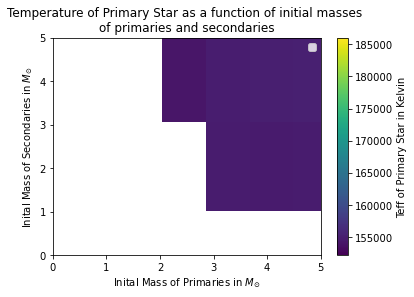

In [30]:
# Indicate which parameters you really want to 
k = 'Teff'
x = almost_all_mass1
y = almost_all_mass2
z = iso1.secondaries[k]
X = np.linspace(0, np.max(x['mass']))
Y = np.linspace(0, np.max(y['mass']))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
Z = iso_interps3P[k](X, Y)
cmesh = plt.pcolormesh(X, Y, Z, shading='auto')
# Now we concern ourselves over the ommitted point

sc = plt.scatter(np.array([x[1952]['mass']]),
                 np.array([y[1952]['mass']]),
                 c=np.array([y[1952]['Teff']]))
plt.legend()
plt.gca().set_xlim([0, 5])
plt.gca().set_ylim([0, 5])
plt.xlabel("Inital Mass of Primaries in $M_{\odot}$")
plt.ylabel("Inital Mass of Secondaries in $M_{\odot}$")
x = plt.colorbar()
x.set_label('Teff of Primary Star in Kelvin')
plt.title("Temperature of Primary Star as a function of initial masses \n" +
          "of primaries and secondaries")
plt.show()

In [31]:
iso_interps3P[k](1.2, 0.96)

array(nan)

We may want to see what works and what does not through the BPASS 6 million year old isochrone; that I will do after doing some more residual and visual tests.